# Acoplador
Un acoplador acota el ancho de banda y adapta impedancia de entrada/salida entre dos etapas. La frecuencia de central $f_0$ se define como
$$
f_0 = \frac{1}{2*\pi*\sqrt{LC}}
$$

El factor de calidad $Q$ del acoplador

$$
Q = \frac{f_0}{BW} = \frac{R_T}{X_L}
$$

donde $BW$ representa el ancho de banda.

La resistencia total $R_T$ del circuito esta definida por la impedancia de entrada $R_a$, la impedancia de salida $R_L$ y la resistencia de pérdida del inductor $R_P$. Para este análisis se desprecia la pérdida en los capacitores. Al adaptar la resistencia de entrada y de salida, las mismas se ven afectadas por un factor de transformación, dados por los pares de capacitores $C_1,C_2$ y $C_3,C_4$, para $R_a$ y $R_L$ respectivamente

$$
R_T = R_a'//R_p//R_L'
$$

donde

$$
\begin{cases}
R_a' = \left( 1 + \frac{C_2}{C_1} \right)^2 R_a \\
R_L' = \left( 1 + \frac{C_3}{C_4} \right)^2 R_L
\end{cases}
$$

Determinando $R_T$ a partir de un parámetro de diseño, es posible determinar el $R_a'$ y el $R_i'$ necesarios para determinado ancho de banda.


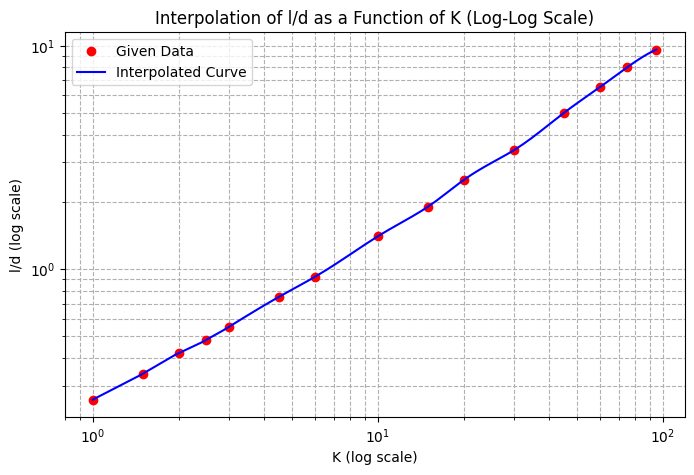

In [1]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

#tabulated data extracted from k/l_d graph
K_data =    [1, 1.5, 2, 2.5, 3, 4.5, 6, 10, 15, 20, 30, 45, 60, 75, 95]
l_d_data =  [0.26, 0.34, 0.42, 0.48, 0.55, 0.75, 0.92, 1.4, 1.9, 2.5, 3.4, 5, 6.5, 8, 9.6]

l_d_interp_func = interpolate.CubicSpline(K_data, l_d_data)
K_smooth = np.linspace(min(K_data), max(K_data), 200)
l_d_smooth = l_d_interp_func(K_smooth)

plt.figure(figsize=(8, 5))
plt.plot(K_data, l_d_data, 'o', label="Given Data", color='red')
plt.plot(K_smooth, l_d_smooth, '-', label="Interpolated Curve", color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("K (log scale)")
plt.ylabel("l/d (log scale)")
plt.title("Interpolation of l/d as a Function of K (Log-Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()


In [2]:
import pandas as pd
#import plotly.graph_objects as go

pd.set_eng_float_format(accuracy=3)

fo = 18e6  # 18 MHz
data = []
#l = 30e-3  # m, longitud del núcleo
d = 0.15 # cm, diámetro del conductor
D = 1.65  # cm, diámetro del núcleo
s = d  # separación entre espiras, usamos el diámetro del conductor
p = s + d  # paso de la espira
Ns = 1 / ((s + d))  # vueltas por cm
Q_c = 10
Rg = 50
Rl = 1000
#l_d = l / D  # relación de aspecto
df = pd.DataFrame(columns=["C", "L", "Ns", "K", "l_d", "l", "N", "Q", "X_L", "Rp", "Rt", "Rap", "RLp", "C1", "C2", "C3", "C4", "Ct"])
for i in range(10):
    C = (120e-12 + i * 10e-12) # pasos de 20 pf
    L = 1 / (fo * 2 * np.pi) ** 2 / C
    K = (L*1e6) * 1e3 / Ns ** 2 / D ** 3  # factor de nagaoka
    l_d = l_d_interp_func(K)
    l = D * l_d
    N = Ns * l
    
    Q = 8550 * D * l / (102 * l + 45 * D) * np.sqrt(fo * 1e-6)  # factor de calidad
    X_L = 2 * np.pi * fo * L
    Rp = Q*X_L
    Rt = Q_c * X_L
    Rap = 2*Rt
    RLp = 2*Rt*Rp/(Rp-2*Rt)
    C2 = C/2*np.sqrt(Rap/Rg)
    C1 = C/2*C2/(C2-C/2)
    C4 = C/2*np.sqrt(RLp/Rl)
    C3 = C/2*C4/(C4-C/2)
    Ct = 1/(1/C1+1/C2) + 1/(1/C3+1/C4)
    df.loc[i] = [C, L, Ns, K, l_d, l, N, Q, X_L, Rp, Rt, Rap, RLp, C1, C2, C3, C4, Ct]  

df #Fila 3  


,C,L,Ns,K,l_d,l,N,Q,X_L,Rp,Rt,Rap,RLp,C1,C2,C3,C4,Ct
0,120.000E-12,651.499E-09,3.333E+00,13.053E+00,1.7038865845360147,2.811E+00,9.371E+00,466.108E+00,73.683E+00,34.344E+03,736.828E+00,1.474E+03,1.540E+03,73.547E-12,325.735E-12,309.111E-12,74.451E-12,120.000E-12
1,130.000E-12,601.384E-09,3.333E+00,12.049E+00,1.6082302560050568,2.654E+00,8.845E+00,460.475E+00,68.015E+00,31.319E+03,680.149E+00,1.360E+03,1.422E+03,80.418E-12,339.036E-12,402.657E-12,77.513E-12,130.000E-12
2,140.000E-12,558.428E-09,3.333E+00,11.188E+00,1.524391142009397,2.515E+00,8.384E+00,455.087E+00,63.157E+00,28.742E+03,631.567E+00,1.263E+03,1.321E+03,87.386E-12,351.834E-12,538.435E-12,80.460E-12,140.000E-12
3,150.000E-12,521.200E-09,3.333E+00,10.442E+00,1.4478908999912352,2.389E+00,7.963E+00,449.753E+00,58.946E+00,26.511E+03,589.463E+00,1.179E+03,1.234E+03,94.451E-12,364.183E-12,752.132E-12,83.307E-12,150.000E-12
4,160.000E-12,488.625E-09,3.333E+00,9.790E+00,1.3764231266010383,2.271E+00,7.570E+00,444.365E+00,55.262E+00,24.557E+03,552.621E+00,1.105E+03,1.157E+03,101.612E-12,376.126E-12,1.135E-09,86.063E-12,160.000E-12
5,170.000E-12,459.882E-09,3.333E+00,9.214E+00,1.3095552738585483,2.161E+00,7.203E+00,438.925E+00,52.011E+00,22.829E+03,520.114E+00,1.040E+03,1.090E+03,108.868E-12,387.702E-12,2.018E-09,88.738E-12,170.000E-12
6,180.000E-12,434.333E-09,3.333E+00,8.702E+00,1.2479374425970615,2.059E+00,6.864E+00,433.531E+00,49.122E+00,21.296E+03,491.219E+00,982.438E+00,1.030E+03,116.218E-12,398.942E-12,6.144E-09,91.338E-12,180.000E-12
7,190.000E-12,411.473E-09,3.333E+00,8.244E+00,1.1917198293597857,1.966E+00,6.554E+00,428.254E+00,46.537E+00,19.929E+03,465.365E+00,930.731E+00,976.326E+00,123.662E-12,409.874E-12,-7.883E-09,93.869E-12,190.000E-12
8,200.000E-12,390.900E-09,3.333E+00,7.832E+00,1.14071867028363,1.882E+00,6.274E+00,423.143E+00,44.210E+00,18.707E+03,442.097E+00,884.194E+00,928.059E+00,131.199E-12,420.522E-12,-2.629E-09,96.336E-12,200.000E-12
9,210.000E-12,372.285E-09,3.333E+00,7.459E+00,1.0945901297959988,1.806E+00,6.020E+00,418.227E+00,42.104E+00,17.609E+03,421.045E+00,842.090E+00,884.382E+00,138.829E-12,430.907E-12,-1.657E-09,98.744E-12,210.000E-12


In [3]:
df.iloc[3] #Usamos la 3ra fila puesto que tiene los valores mas "realizables"

C             150.000E-12
L             521.200E-09
Ns              3.333E+00
K              10.442E+00
l_d    1.4478908999912352
l               2.389E+00
N               7.963E+00
Q             449.753E+00
X_L            58.946E+00
Rp             26.511E+03
Rt            589.463E+00
Rap             1.179E+03
RLp             1.234E+03
C1             94.451E-12
C2            364.183E-12
C3            752.132E-12
C4             83.307E-12
Ct            150.000E-12
Name: 3, dtype: object

In [15]:
L = df.loc[3, "L"]
C1 = 100e-12
C2 = 330e-12
C3 = 680e-12
C4 = 82e-12
Ct = 1/(1/C1+1/C2) + 1/(1/C3+1/C4)
print(Ct)
fo_c=1/(2*np.pi*np.sqrt(Ct*L))
print(fo_c)

1.4992003906488432e-10
18004799.575084765


In [12]:
fo_1=12.3e6
fo_2=11e6
Cf = 82e-12
Cx = (Ct*(fo_2**2-fo_1**2)+Cf*fo_2**2)/(fo_1**2-fo_2**2)
Cx

1.7764681468222694e-10

In [13]:
Lm = (1/2/np.pi/fo_1)**2*1/(Ct+Cx)
print(Lm)

5.111284924597083e-07


In [17]:
fo_m = 1/2/np.pi/np.sqrt(Lm*Ct)
print(fo_m)

18181312.97081598
